## Project 7
### Brenden Latham, Ashish Yonzon, Afolabi Oluwatobi
### CPSMA-4413
### Dr. Jacob

In this project we will be exploring methods of approximating integral. We will be using the exponential function for all mathods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

In [2]:
def f(x):
  return(np.exp(x))

Let's fist look at a graph of our function on our chosen interval [0,2].

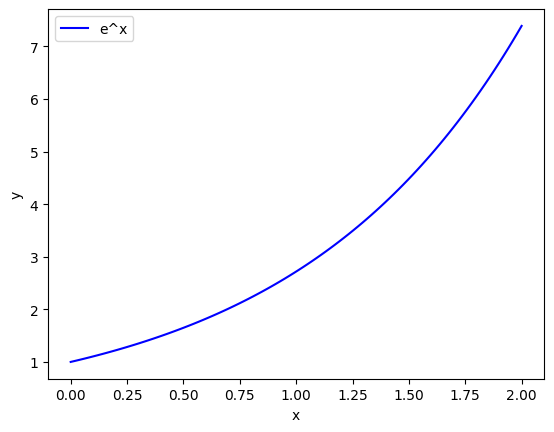

In [3]:
x = np.linspace(0, 2, 100)

plt.plot(x, f(x), label='e^x',color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We will now use a built-in scipy function to estimate this definite integral. We can use this to check the accuracy of our own functions.

In [4]:
sc.integrate.quad(f,0,2)

(6.3890560989306495, 7.093277186654589e-14)

Now that we have a good estimate, let's make a function for computing the riemann sum.

In [5]:
def riemann(rectangles,lower,upper,kind,display):
  points = []
  t = []
  step = (upper-lower)/rectangles
  if kind == "left":
    points.append(f(lower))
    last = lower
  elif kind == "right":
    points.append(f(lower+step))
    last = lower+step
  elif kind == "middle":
    points.append(f(lower+(step/2)))
    last = lower+(step/2)
  t.append(last)
  for i in range(1,rectangles,1):
    t.append(last+step)
    points.append(f(last+step))
    last = last+step
  if display == 'show':
    x = np.linspace(lower, upper, 1000)
    plt.plot(x, f(x), label='e^x',color='blue')
    plt.scatter(t,points)
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()  
  return(np.sum(points)*step)
 

First I want to demonstrate the riemann sum with samples taken from the middle of the rectangles. I will plot where our sampled come from, and then show the result of the estimate under the plot.

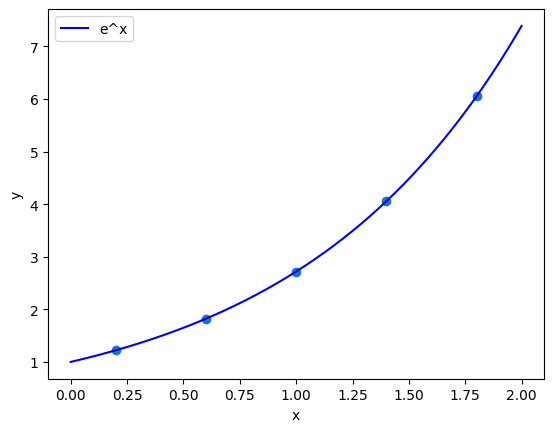

6.346660327306939

In [6]:
riemann(5,0,2,'middle','show')

That is a pretty good estimate, though very slightly under the actual value. Let's do the same thing for samples taken from the left of the rectangles.

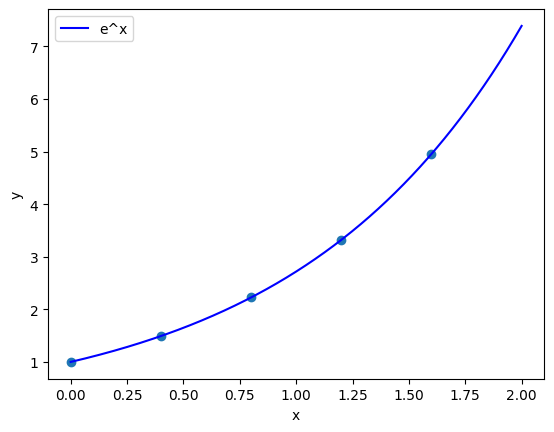

5.196205989306161

In [7]:
riemann(5,0,2,'left','show')

This estimate is a good bit under the actual value. Let's see how right side samples do.

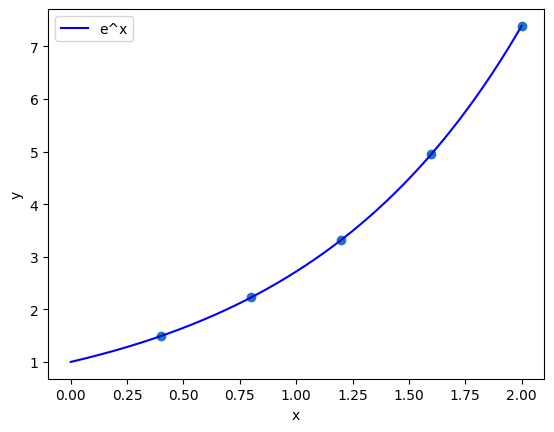

7.7518284288784205

In [8]:
riemann(5,0,2,'right','show')

It looks like this one is just as badly over as the previous was under. These approximations are bound to be innacurate using only 5 rectangles. Let's see how much the middle sample method improves as the number of rectangles increases.

In [9]:
rectangles = [1]
value = [np.exp(1)]
relative_error = [0]
for i in range(1,10,1):
  rectangles.append(i+1)
  value.append(riemann(i+1,0,2,'middle','no'))
  relative_error.append((value[i]-value[i-1])/value[i-1])
df = pd.DataFrame({'rectangles':rectangles,'value':value,'relative error':relative_error})
df

,rectangles,value,relative error
0,1,2.718282,0.000000
1,2,6.130410,1.255252
2,3,6.272256,0.023138
3,4,6.322986,0.008088
4,5,6.346660,0.003744
5,6,6.359573,0.002035
6,7,6.367376,0.001227
7,8,6.372448,0.000797
8,9,6.375929,0.000546
9,10,6.378420,0.000391


It seems like the accuracy quickly improves when we use more and more rectangles. While we can't really use true error here because of the nature of our function, relative error should be sufficient to show the rate of improvement.

Now we will look at a better method for approximating definite integrals, the trapezoid method.

In [10]:
def trapezoid(lower, upper):
  return((upper-lower)*(f(upper)+f(lower))/2)

While we are at it, let's code simpsons 1/3 rule. It is just a little extension for the trapezoid rule that should increase the accuracy with less intervals.

In [11]:
def simpsons(lower,upper):
  h = (upper-lower)/2
  return((h/3)*(f(lower)+(4*f((lower+upper)/2))+f(upper)))

Now let's implement these in a nice function which we can use to compare.

In [12]:
def integrate(n, lower, upper, method):
  areas = []
  step = (upper-lower)/n
  areas.append(method(lower,lower+step))
  last = lower+step
  for i in range(1,n,1):
    areas.append(method(last,last+step))
    last = last+step
  return(np.sum(areas))

Let's take a look at the trapezoid method does with 10 sample points.

In [13]:
integrate(10,0,2,trapezoid)

6.410338768199613

That is pretty accurate, but let's now see how we do using simpsons 1/3 rule.

In [14]:
integrate(10,0,2,simpsons)

6.389059644185124

This converged to a more accurte value in the same number of intervals. Nice

We will now compare how quickly these two converge to the actual value as the number of trapezoids increases. First the normal trapezoid method, then the trapezoid method using simpsons 1/3 rule.

In [15]:
rectangles = [1]
value = [np.exp(1)]
relative_error = [0]
for i in range(1,10,1):
  rectangles.append(i+1)
  value.append(integrate(i+1,0,2,trapezoid))
  relative_error.append((value[i]-value[i-1])/value[i-1])
df = pd.DataFrame({'trapezoids':rectangles,'value':value,'relative error':np.abs(relative_error)})
df

,trapezoids,value,relative error
0,1,2.718282,0.000000
1,2,6.912810,1.543081
2,3,6.623953,0.041786
3,4,6.521610,0.015450
4,5,6.474017,0.007298
5,6,6.448105,0.004003
6,7,6.432460,0.002426
7,8,6.422298,0.001580
8,9,6.415327,0.001085
9,10,6.410339,0.000778


In [16]:
rectangles = [1]
value = [np.exp(1)]
relative_error = [0]
for i in range(1,10,1):
  rectangles.append(i+1)
  value.append(integrate(i+1,0,2,simpsons))
  relative_error.append((value[i]-value[i-1])/value[i-1])
df = pd.DataFrame({'trapezoids':rectangles,'value':value,'relative error':np.abs(relative_error)})
df

,trapezoids,value,relative error
0,1,2.718282,0.000000e+00
1,2,6.391210,1.351195e+00
2,3,6.389489,2.693716e-04
3,4,6.389194,4.614624e-05
4,5,6.389113,1.269396e-05
5,6,6.389083,4.574138e-06
6,7,6.389071,1.964310e-06
7,8,6.389065,9.544209e-07
8,9,6.389062,5.083058e-07
9,10,6.389060,2.906164e-07


It looks like when we use simpson's 1/3 rule, we can approach the true value way faster than when not. The fact that the implementation of simpson's 1/3 for each trapezoid can just be a closed equation means we don't even add much (if any) computation time. Simpson really struck gold with this. It seems like for increasing functions, the left endpoint method will yield under-estimates, while right will be an over-estimate. It seems like the middle method will be slightly under, but the best of the riemann methods. Trapezoid and simpsons 1/3 seem to be very slightly over. This is just due to how we position the top lines for our rectangles\trapezoids. If the rectangles\trapezoids tend to go over the graph, we will have an over-estimate, while if they tend to go under, we will have an under-estimate.